In [1]:
from ast import arg

import matplotlib.cbook as cbook
import random
import itertools
import copy
import os

from analysis_utils import*
import numpy as np
import json
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
methods = ['degree', 'clsCloseness', 'clsKcore', 'clsEigenvector', 'KMcore_g1', 'KMcore_gf', 
                 'neiNodesNum', 'new_neiNodeSum_1',]  

msPath = '../../MeasureValuesRanking/NodesMeasures'
msDic = dict()
net = 25
msDic[net] = dict()
for ms in methods:
    with open(f'{msPath}/h_{ms}_realNet_{net}.json','r') as f:
        msDic[net][ms] = json.load(f)
with open('iniNodes_25.json','r') as f:
    ininodes = json.load(f)

In [3]:
colors = {
          'new_neiNodeSum_1':'red',
          'degree': 'darkblue', # 'royalblue',
          'clsBetweenness': (168/255, 163/255, 219/255),# plt.cm.tab20(8), #'lavender', 
          'clsCloseness': (198/255, 143/255, 198/255), # 'thistle',  
          'clsKcore':(197/255, 215/255, 192/255), 
          'clsEigenvector': (255/255, 222/255, 153/255), # 'navajowhite', 
          'KMcore_g1': 'darkolivegreen', #'seagreen',
          'KMcore_gf': 'darkgreen', # 'darkolivegreen', 
          'neiNodesNum': (156/255, 176/255, 202/255) , #'lightsteelblue', # 'powderblue', 
          'nodeEdgeEigenvector_linear': (164/255, 114/255, 11/255), # 'darkgoldenrod', # 'darksalmon',  # 'gold',
          'nodeEdgeEigenvector_max': (255/255, 120/255, 0), # 'darkorange',
          }

In [4]:
xx = dict()
for mtd in methods:
    t = caltau(msDic[25]['new_neiNodeSum_1'],msDic[25][mtd],'b')
    xx[mtd] = t

In [5]:
# nu = 1 , l = 0.1
mu = 1
nets_paras = {
    25:{'net':25, 'l':[1e-1]}, #[1e-5, 1e-4, 1e-3, 1e-2]
}

In [6]:
Mu = int(mu*10)

resultDic = defaultdict(dict)

# nu=1, l=0.1
# Preprocess it into a dictionary, 
# where the key is the network parameter and the value is a result dictionary 
# (the key is the node number and the value is the node)
with open(f'SIR_25_robust_range_mu{Mu}_add_nu1_1.json', 'r') as f:
    result = json.load(f)
for item in result:
    itemsp = item.split('_')
    net = itemsp[0][1:]
    nu = itemsp[1][2:]
    l = itemsp[2][1:]
    node = itemsp[4][3:]
    resultDic[f'n{net}_nu{nu}_l{l}'][node] = result[item]


In [7]:
nu = 1
l = 0.1
yy = dict()
for mtd in methods:
    t = caltau(resultDic[f'n{net}_nu{nu}_l{l}'],msDic[25][mtd],'b')
    yy[mtd] = t

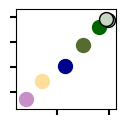

In [8]:
plt.figure(figsize=(1.3,1.3))
for mtd in ['degree', 'clsCloseness',  'clsEigenvector', 'KMcore_g1', 'KMcore_gf',]:
    plt.scatter([xx[mtd]],[yy[mtd]], color=colors[mtd], 
                s=100)
for mtd in ['neiNodesNum','clsKcore',]:
    plt.scatter([xx[mtd]],[yy[mtd]], color=colors[mtd], 
                edgecolors='black',
                # alpha=0.5,
                s=100)
plt.xlim([0.55,1.035])
plt.ylim([0.53,0.93])
# plt.tick_params(axis='y', labelsize=16)  
# plt.tick_params(axis='x', labelsize=16)
plt.xticks([0.75,1.00])
plt.yticks([0.6,0.7,0.8,0.9])
plt.tick_params(axis='y', which='major', size=4, width=1.5)  
plt.tick_params(axis='x', which='major', size=4, width=1.5)  
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.savefig(f'savefig_big/scatter.svg', format='svg', bbox_inches='tight',dpi=300)

plt.show()